# 1. 변수관찰 및 시각화 

In [568]:
import pandas as pd
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, '')
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import re
import scipy as sp

plt.style.use('fivethirtyeight')

# 노트북 안에 그래프 그리기
%matplotlib inline
# 그래프 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

# 컬럼을 다 보여주는 함수
from IPython.display import display
pd.options.display.max_columns = None

# 한글 font 설정
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname = 'c:/Windows/Fonts/NanumGothic.ttf',size = 50).get_name()
plt.rc('font',family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold

In [455]:
train = pd.read_csv('http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv')

In [456]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [457]:
print("train`s shape :", train.shape)

train`s shape : (891, 12)


In [458]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [459]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 변수관찰

In [460]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

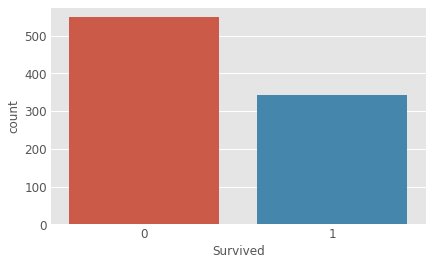

In [461]:
sns.countplot('Survived', data = train)

In [462]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

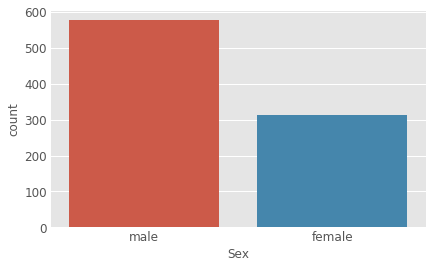

In [463]:
sns.countplot('Sex',data = train)

In [464]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

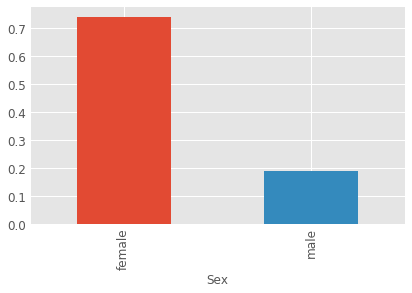

In [465]:
train.groupby('Sex')['Survived'].mean().plot.bar()

In [466]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

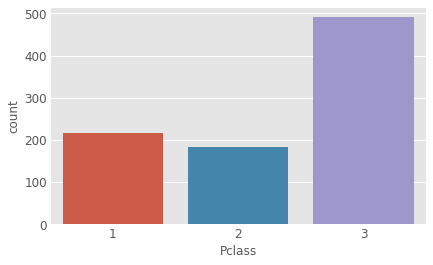

In [467]:
sns.countplot('Pclass',data = train)

In [468]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

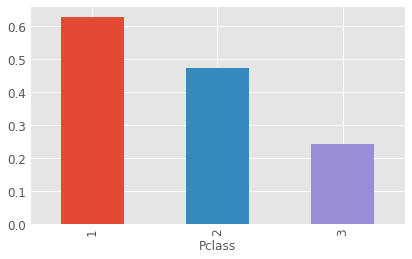

In [469]:
train.groupby('Pclass')['Survived'].mean().plot.bar()

In [470]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

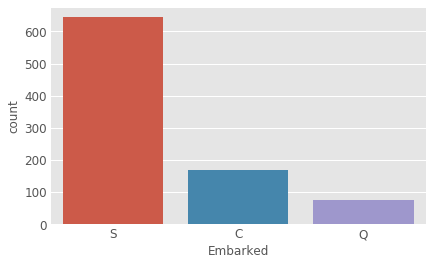

In [471]:
sns.countplot('Embarked',data = train)

In [472]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

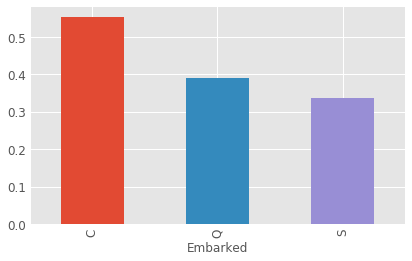

In [473]:
train.groupby('Embarked')['Survived'].mean().plot.bar()

In [474]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

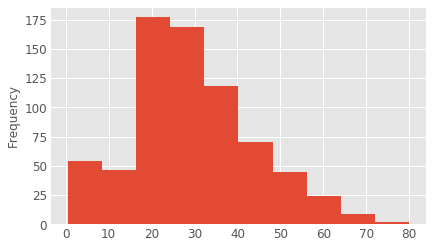

In [475]:
train['Age'].plot.hist()

In [476]:
train['Age'] = train['Age'].fillna(train['Age'].median())

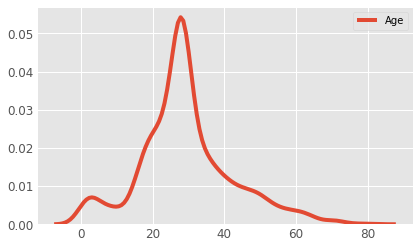

In [477]:
sns.kdeplot(train['Age'])

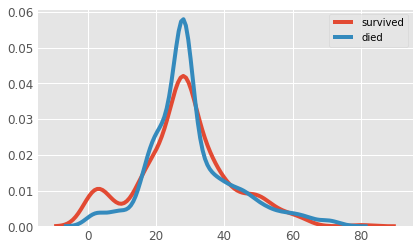

In [478]:
sns.kdeplot(train.loc[train['Survived']==1,'Age'],label='survived')
sns.kdeplot(train.loc[train['Survived']==0,'Age'],label='died')

In [479]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

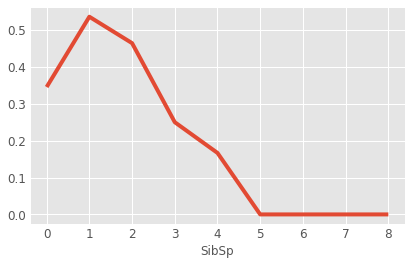

In [480]:
train.groupby('SibSp')['Survived'].mean().plot()

In [481]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

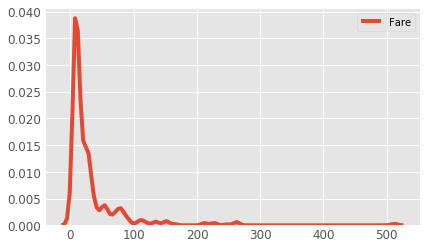

In [482]:
sns.kdeplot(train['Fare'])

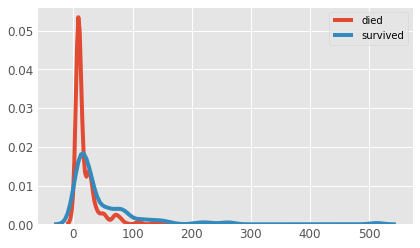

In [483]:
sns.kdeplot(train.loc[train['Survived']==0,'Fare'],label='died')
sns.kdeplot(train.loc[train['Survived']==1,'Fare'],label='survived')

In [484]:
def pie_chart(x):
    survived = train[train['Survived'] == 1][x].value_counts()
    dead = train[train['Survived'] == 0][x].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'pie', stacked = True, explode=[0,0.1], autopct = '%1.1f%%', subplots=True, shadow = True,figsize = (10,10))
    plt.show()

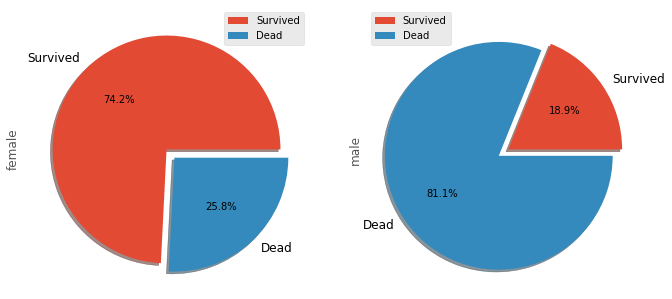

In [485]:
pie_chart('Sex')

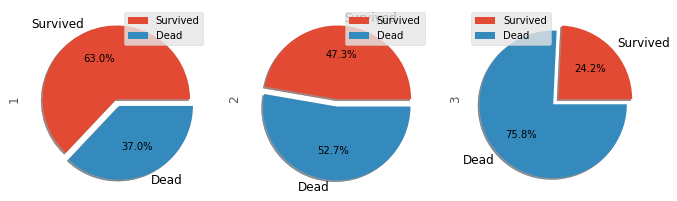

In [486]:
pie_chart('Pclass')

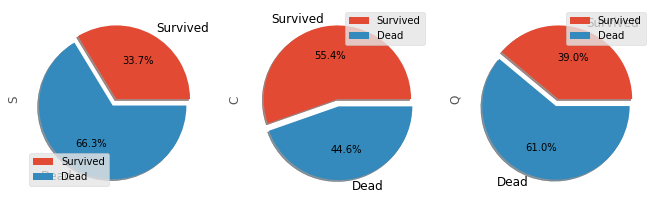

In [487]:
pie_chart('Embarked')

In [488]:
def bar_chart(x):
    survived = train[train['Survived'] == 1][x].value_counts()
    dead = train[train['Survived'] == 0][x].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True)
    plt.show()

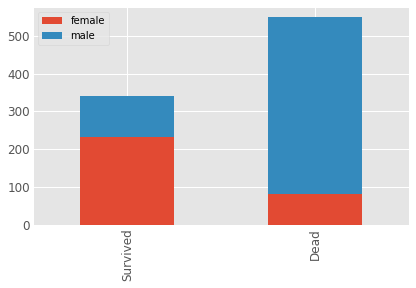

In [489]:
bar_chart('Sex')

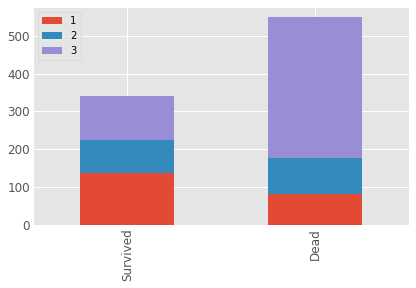

In [490]:
bar_chart('Pclass')

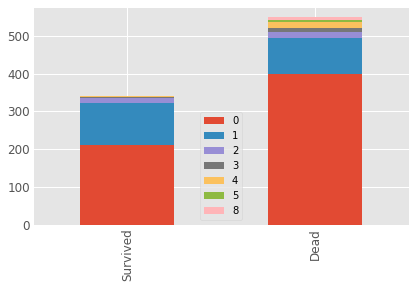

In [491]:
bar_chart('SibSp')

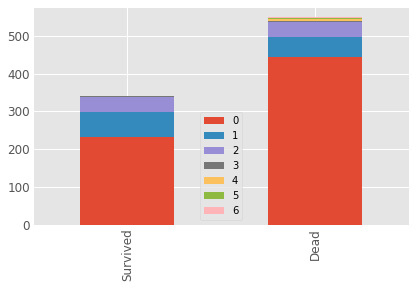

In [492]:
bar_chart('Parch')

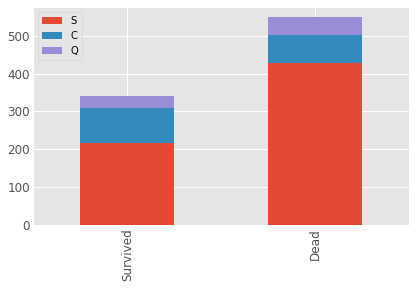

In [493]:
bar_chart('Embarked')

# 2. Feature Engineering

#### Embarked의 결측치 2개에는 최빈값인 S를 채웠다.

In [494]:
train['Embarked'] = train['Embarked'].fillna('S')

#### SibSp와 Parch에 + 1을 하여 가족수 변수를 생성하였다.

In [495]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

#### Name의 이름을 추출하여 Main_name 변수 생성

In [496]:
x = train['Name']
mid_name = x.str.extract('([A-Za-z]+)\.', expand = False)

In [497]:
train['Main_name'] = mid_name

In [498]:
train.loc[train['Main_name'] == 'Mlle', 'Main_name'] = 'Miss'
train.loc[train['Main_name'] == 'Ms','Main_name'] = 'Miss'
train.loc[train['Main_name'] == 'Mme', 'Main_name'] = 'Mrs'
train.loc[train['Main_name'] == 'Capt', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Col', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Countess', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Don', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Dr', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Jonkheer' , 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Lady', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Major', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Rev', 'Main_name'] = 'Others'
train.loc[train['Main_name'] == 'Sir', 'Main_name'] = 'Others'

#### Age의 결측값은 Familly_Size의 평균값으로 대체하였고 Main_name의 중앙값을 사용하였다.

In [499]:
train['Age'] = train['Age'].fillna(train.groupby('Main_name')['Age'].transform("median"))

In [500]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_size      0
Main_name        0
dtype: int64

#### 각 변수별로 구간화를 진행하여 새 변수를 만들었다.

In [501]:
x= train['Age']
def Age_group(x):
    if x <= 10 :
        return '0'
    elif x > 10 and x <= 25 :
        return '1'
    elif x > 25 and x <= 40 :
        return '2'
    elif x > 40 and x <= 60:
        return '3'
    else :
        return '4'

In [502]:
train['Age_group'] = train['Age'].map(lambda x : Age_group(x))

In [503]:
x= train['Fare']
def Fare_group(x):
    if x <= 10 :
        return '0'
    elif x > 10 and x <= 25 :
        return '1'
    elif x > 25 and x <= 50 :
        return '2'
    elif x > 50 and x <= 100 :
        return '3'
    else :
        return '4'

In [504]:
train['Fare_group'] = train['Fare'].map(lambda x : Fare_group(x))

In [505]:
x= train['Family_size']
def F_group(x):
    if x == 1 :
        return '0'
    elif x > 1 and x < 4:
        return '1'
    elif x >= 4 and x < 8:
        return '2'
    elif x>=8 and x < 10:
        return '3'
    else:
        return '4'

In [506]:
train['F_group'] = train['Family_size'].map(lambda x : F_group(x))

#### Cabin 변수는 결측값 비율이 77%이므로 분석에서 제외

In [507]:
print('Cabin`s NA :', train['Cabin'].isna().sum() / len(train))

Cabin`s NA : 0.7710437710437711


#### Ticket변수는 첫번째 변수를 따서 영어는 0 숫자는 1로 mapping

In [508]:
train['Ticket'] = train['Ticket'].astype(str)

In [509]:
train['Ticket_title'] = train['Ticket'].str[:1]

In [510]:
Ticket_mapping = {'P' : 0, 'S' :0, 'C' : 0, 'A' :0, 'W' : 0,'F' : 0, 'L':0, '3' : 1,'2':1,'1':1,'4' :1,'7':1,'6':1,'5':1,'8':1,'9':1}

In [511]:
train['Ticket_title'] = train['Ticket_title'].map(Ticket_mapping)

In [512]:
train['Ticket_title'] = train['Ticket_title'].astype(float)

#### 머신러닝 모델은 숫자만 인식하므로 범주형 변수에 대해 get_dummies를 이용하여 숫자형으로 변형시켰다.

In [513]:
train['Sex'] = train['Sex'].map({'female' : 0, 'male' : 1})

In [514]:
train = pd.get_dummies(train, columns = ['Age_group','Fare_group','Embarked','Main_name','F_group','Pclass'])

## test set에서도 train set과 동일한 과정을 진행하였다.

In [515]:
test = pd.read_csv('http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv',engine = 'python')

In [516]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [517]:
test['Family_size'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Family_size, dtype: int64

#### . test셋에서도 Cabin의 결측치가 78%이므로 제외

In [518]:
test.isna().sum() / len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
Family_size    0.000000
dtype: float64

#### Ticket 변수는 train과 마찬가지로 feature engineering

In [519]:
test['Ticket'] = test['Ticket'].astype(str)

In [520]:
test['Ticket_title'] = test['Ticket'].str[:1]

In [521]:
test['Ticket_title'].value_counts()

3    128
2     95
1     64
S     33
P     33
C     30
A     13
F      6
W      6
7      4
6      3
L      1
9      1
4      1
Name: Ticket_title, dtype: int64

In [522]:
Ticket_mapping2 = {'3':1,'2':1,'1':1,'P':0,'S':0,'C':0,'A':0,'F':0,'W':0,'7':1,'6':1,'4':1,'9':1,'L':0}

In [523]:
test['Ticket_title'] = test['Ticket_title'].map(Ticket_mapping2)

#### Age의 결측치에는 Family_size의 나이평균값으로 채웠고,
#### Fare은 다른 Fare값들의 median값으로 채웠다.

In [524]:
test['Age'] = test['Age'].fillna(test.groupby('Family_size')['Age'].transform("median"))

In [525]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [526]:
x = test['Name']
mid_name = x.str.extract('([A-Za-z]+)\.', expand = False)

In [527]:
test['Main_name'] = mid_name

In [528]:
test.loc[test['Main_name'] == 'Ms','Main_name'] = 'Miss'
test.loc[test['Main_name'] == 'Col', 'Main_name'] = 'Others'
test.loc[test['Main_name'] == 'Rev', 'Main_name'] = 'Others'
test.loc[test['Main_name'] == 'Dona', 'Main_name'] = 'Others'
test.loc[test['Main_name'] == 'Dr', 'Main_name'] = 'Others'

In [529]:
x= test['Age']
def Age_group(x):
    if x <= 10 :
        return '0'
    elif x > 10 and x <= 25 :
        return '1'
    elif x > 25 and x <= 40 :
        return '2'
    elif x > 40 and x <= 60 :
        return '3'
    else :
        return '4'

In [530]:
test['Age_group'] = test['Age'].map(lambda x : Age_group(x))

In [531]:
x= test['Fare']
def Fare_group(x):
    if x <= 10 :
        return '0'
    elif x >= 10 and x <= 25 :
        return '1'
    elif x >= 25 and x <= 50 :
        return '2'
    elif x >= 50 and x <= 100 :
        return '3'
    else :
        return '4'

In [532]:
test['Fare_group'] = test['Fare'].map(lambda x : Fare_group(x))

In [533]:
x= test['Family_size']
def F_group(x):
    if x == 1 :
        return '0'
    elif x > 1 and x < 4:
        return '1'
    elif x >= 4 and x < 8:
        return '2'
    elif x >= 8 and x < 10:
        return '3'
    else:
        return '4'

In [534]:
test['F_group'] = test['Family_size'].map(lambda x : F_group(x))

In [535]:
test['Sex'] = test['Sex'].map({'female' : 0, 'male' : 1})

In [536]:
test = pd.get_dummies(test, columns = ['Age_group','Fare_group','Embarked','Main_name','F_group','Pclass'])

In [537]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Family_size', 'Ticket_title', 'Age_group_0',
       'Age_group_1', 'Age_group_2', 'Age_group_3', 'Age_group_4',
       'Fare_group_0', 'Fare_group_1', 'Fare_group_2', 'Fare_group_3',
       'Fare_group_4', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Main_name_Master', 'Main_name_Miss', 'Main_name_Mr', 'Main_name_Mrs',
       'Main_name_Others', 'F_group_0', 'F_group_1', 'F_group_2', 'F_group_3',
       'F_group_4', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [538]:
test.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Family_size', 'Ticket_title', 'Age_group_0', 'Age_group_1',
       'Age_group_2', 'Age_group_3', 'Age_group_4', 'Fare_group_0',
       'Fare_group_1', 'Fare_group_2', 'Fare_group_3', 'Fare_group_4',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Main_name_Master',
       'Main_name_Miss', 'Main_name_Mr', 'Main_name_Mrs', 'Main_name_Others',
       'F_group_0', 'F_group_1', 'F_group_2', 'F_group_3', 'F_group_4',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [543]:
train_columns = ['Sex', 'Ticket_title', 'Age_group_0',
       'Age_group_1', 'Age_group_2', 'Age_group_3', 'Age_group_4',
       'Fare_group_0', 'Fare_group_1', 'Fare_group_2', 'Fare_group_3',
       'Fare_group_4', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Main_name_Master', 'Main_name_Miss', 'Main_name_Mr', 'Main_name_Mrs',
       'Main_name_Others', 'F_group_0', 'F_group_1', 'F_group_2', 'F_group_3',
       'F_group_4', 'Pclass_1', 'Pclass_2', 'Pclass_3']

In [650]:
x_train = train[train_columns]
y_train = train['Survived']
test = test[train_columns]

# 3. 모델 적용 및 제출

### . RandomForest

In [652]:
rfc=RandomForestClassifier(random_state=6)

param_grid = { 
    'n_estimators': [200, 500, 700, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10]
}

RFR = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
RFR.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500, 700, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [653]:
RFR.best_params_

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}

In [654]:
rfr=RandomForestClassifier(random_state=6, max_features='auto', n_estimators= 200, max_depth=4)

In [655]:
model = rfr.fit(x_train,y_train)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [656]:
y_pred = model.predict(test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [657]:
test2 = pd.read_csv('http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv',engine = 'python')
test2['Survived'] = y_pred

In [658]:
final = test2[['PassengerId','Survived']]

In [ ]:
final.to_csv('C:/Users/laks1/Downloads/titanic.csv',sep=',',index = False)

#### . kaggle`s score : 79.9